In [7]:
import kaggle
import kagglehub


In [8]:
# Import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [11]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts().head(5)
frequency_table


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [12]:
# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

Text(0.5, 0, 'category')

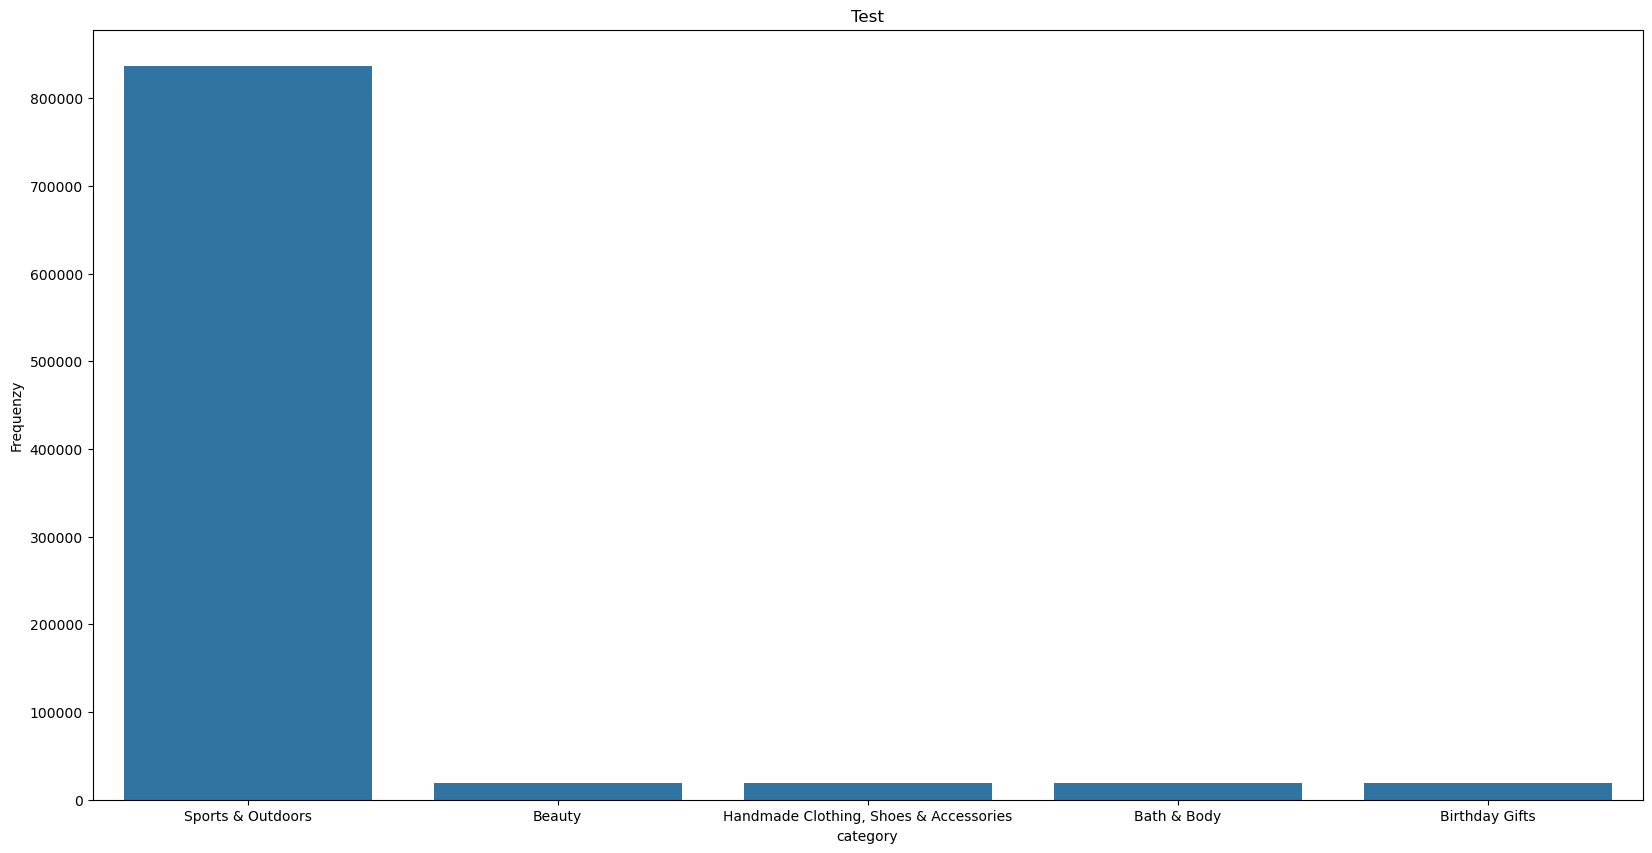

In [13]:
plt.figure(figsize=(20,10))  # figure always needs to happen first 
sns.barplot(data=frequency_table)   
plt.title("Test")
plt.ylabel("Frequenzy")
plt.xlabel("category")

In [14]:
pd.qcut(df["price"], q=4, labels = ["very cheap", "cheap", "expensive", "very expensive"])

0               expensive
1               expensive
2               expensive
3               expensive
4                   cheap
                ...      
2443646         expensive
2443647    very expensive
2443648    very expensive
2443649    very expensive
2443650    very expensive
Name: price, Length: 2443651, dtype: category
Categories (4, object): ['very cheap' < 'cheap' < 'expensive' < 'very expensive']

<Axes: xlabel='price', ylabel='count'>

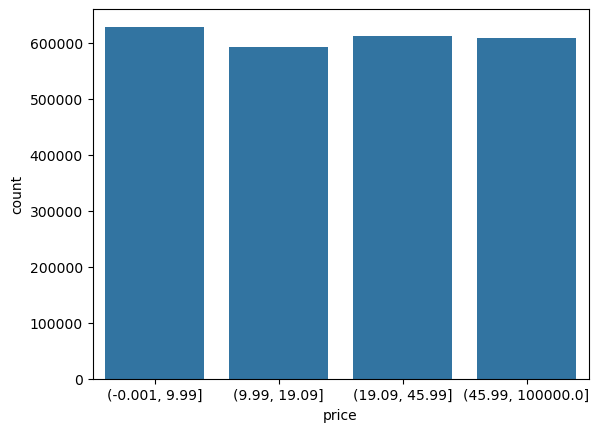

In [15]:
price_bin = pd.qcut(df["price"], q=4)
sns.countplot(x=price_bin)

Challenge 2


In [16]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [17]:
outliers = tukeys_test_outliers(df["price"])
outliers


10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [18]:
# Use .loc with a lambda function to filter out the outliers without using the operator
df_cleaned = df.loc[df["price"].apply(lambda x: x not in outliers.values)].reset_index(drop=True)

KeyboardInterrupt: 